In [3]:
import pandas as pd
import numpy as np
from sklearn.datasets import make_classification

In [4]:
X,y = make_classification(n_samples=1000,n_features=10,n_informative=2)

In [12]:
df = pd.DataFrame(X)
df["target"]=y
df.head()

,0,1,2,3,4,5,6,7,8,9,target
0,-0.680922,1.460070,-1.006216,-0.372979,-0.584525,-0.739979,0.821676,-1.694985,-1.252328,1.025725,1
1,-0.937254,-0.368094,-0.504034,-0.133132,-0.004940,-0.378607,0.621755,0.851763,-0.632478,0.522812,1
2,-0.710042,0.889336,1.474891,-1.228571,0.067840,-0.840698,-0.485163,0.703721,0.583715,0.681071,1
3,0.495702,1.562563,-0.198933,0.386620,1.495757,1.631532,-2.462208,-0.018852,0.908413,-1.814392,0
4,1.883684,0.038250,-0.047823,0.252024,1.714145,-1.764066,2.138937,-1.458677,-1.183706,2.010412,1


In [24]:
# function for row sampling
def sample_rows(df,percentage):
    return df.sample(int(percentage*df.shape[0]), replace=True)

In [38]:
import random
# feature for feature sample
def sample_features(df, percentage):
  random_cols = random.sample(df.columns.tolist()[:-1],int(percentage*(df.shape[1]-1)))
  new_df = df[random_cols]
  new_df["target"] = df["target"]
  return new_df

In [39]:
# function for combined sampling
def combined_sampling(df,row_percentage, col_percentage):
  new_df = sample_rows(df,row_percentage)
  return sample_features(new_df, col_percentage)

In [40]:
df1 = combined_sampling(df,0.5,0.5)

/tmp/ipython-input-875061634.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df["target"] = df["target"]


In [41]:
df2 = combined_sampling(df,0.5, 0.5)

/tmp/ipython-input-875061634.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df["target"] = df["target"]


In [42]:
df3 = combined_sampling(df, 0.5, 0.5)

/tmp/ipython-input-875061634.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df["target"] = df["target"]


In [45]:
print(df1.columns)
print(df2.columns)
print(df3.columns)

Index([8, 9, 2, 0, 3, 'target'], dtype='object')
Index([8, 0, 4, 9, 3, 'target'], dtype='object')
Index([6, 4, 8, 5, 9, 'target'], dtype='object')


In [46]:
df3

,6,4,8,5,9,target
37,0.988842,-0.541705,0.891646,0.842914,-1.039314,0
590,-1.949578,1.016375,-1.531777,-0.957122,1.305470,1
251,2.339101,-0.081859,-0.806805,-0.589931,0.771496,0
13,1.483080,-1.838710,-1.654794,-0.973046,1.350728,1
500,2.523572,-1.860631,-1.403523,1.661734,-1.285938,0
...,...,...,...,...,...,...
529,1.022059,-0.202275,2.242566,0.702898,-1.228463,0
942,0.739298,0.158044,0.521478,-0.805706,0.661881,1
33,-0.538930,-0.892799,1.196334,0.891152,-1.160013,0
385,-0.936746,0.479261,-1.028228,-0.409896,0.648917,1


In [47]:
from sklearn.tree import DecisionTreeClassifier
clf1 = DecisionTreeClassifier()
clf2 = DecisionTreeClassifier()
clf3 = DecisionTreeClassifier()

In [48]:
clf1.fit(df1.drop("target",axis=1),df1["target"])
clf2.fit(df2.drop("target",axis=1),df2["target"])
clf3.fit(df3.drop("target",axis=1),df3["target"])

DecisionTreeClassifier()

In [49]:
from sklearn.tree import plot_tree

[Text(0.4652777777777778, 0.9545454545454546, 'x[1] <= 0.176\ngini = 0.5\nsamples = 500\nvalue = [244, 256]'),
 Text(0.2708333333333333, 0.8636363636363636, 'x[1] <= -0.175\ngini = 0.165\nsamples = 253\nvalue = [230, 23]'),
 Text(0.3680555555555556, 0.9090909090909092, 'True  '),
 Text(0.1527777777777778, 0.7727272727272727, 'x[2] <= 2.556\ngini = 0.08\nsamples = 216\nvalue = [207, 9]'),
 Text(0.09722222222222222, 0.6818181818181818, 'x[1] <= -0.692\ngini = 0.064\nsamples = 213\nvalue = [206.0, 7.0]'),
 Text(0.06944444444444445, 0.5909090909090909, 'gini = 0.0\nsamples = 166\nvalue = [166, 0]'),
 Text(0.125, 0.5909090909090909, 'x[1] <= -0.604\ngini = 0.254\nsamples = 47\nvalue = [40, 7]'),
 Text(0.05555555555555555, 0.5, 'x[3] <= -0.122\ngini = 0.494\nsamples = 9\nvalue = [5, 4]'),
 Text(0.027777777777777776, 0.4090909090909091, 'gini = 0.0\nsamples = 4\nvalue = [0, 4]'),
 Text(0.08333333333333333, 0.4090909090909091, 'gini = 0.0\nsamples = 5\nvalue = [5, 0]'),
 Text(0.194444444444444

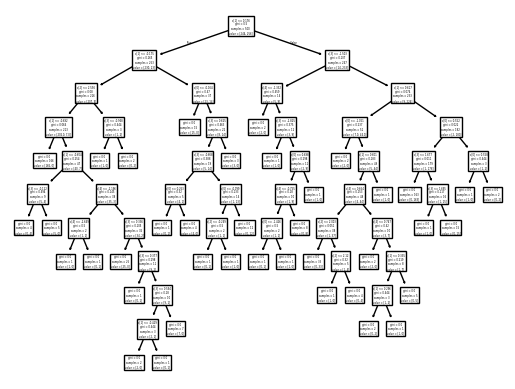

In [50]:
plot_tree(clf1)

[Text(0.46176470588235297, 0.95, 'x[3] <= 0.197\ngini = 0.5\nsamples = 500\nvalue = [246, 254]'),
 Text(0.18823529411764706, 0.85, 'x[3] <= -0.352\ngini = 0.198\nsamples = 252\nvalue = [224, 28]'),
 Text(0.325, 0.8999999999999999, 'True  '),
 Text(0.11764705882352941, 0.75, 'x[4] <= 1.827\ngini = 0.05\nsamples = 194\nvalue = [189, 5]'),
 Text(0.07058823529411765, 0.65, 'x[0] <= 2.79\ngini = 0.031\nsamples = 191\nvalue = [188, 3]'),
 Text(0.047058823529411764, 0.55, 'x[3] <= -0.665\ngini = 0.021\nsamples = 190\nvalue = [188, 2]'),
 Text(0.023529411764705882, 0.45, 'gini = 0.0\nsamples = 167\nvalue = [167, 0]'),
 Text(0.07058823529411765, 0.45, 'x[3] <= -0.659\ngini = 0.159\nsamples = 23\nvalue = [21, 2]'),
 Text(0.047058823529411764, 0.35, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.09411764705882353, 0.35, 'x[3] <= -0.646\ngini = 0.087\nsamples = 22\nvalue = [21, 1]'),
 Text(0.07058823529411765, 0.25, 'x[2] <= -1.3\ngini = 0.444\nsamples = 3\nvalue = [2, 1]'),
 Text(0.047058823

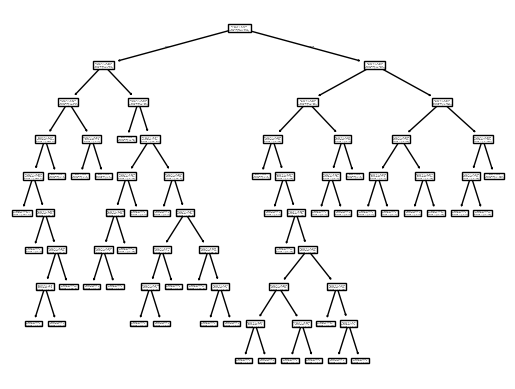

In [52]:
plot_tree(clf2)

[Text(0.3313953488372093, 0.9615384615384616, 'x[4] <= 0.037\ngini = 0.5\nsamples = 500\nvalue = [257, 243]'),
 Text(0.1511627906976744, 0.8846153846153846, 'x[3] <= -0.21\ngini = 0.14\nsamples = 250\nvalue = [231, 19]'),
 Text(0.24127906976744184, 0.9230769230769231, 'True  '),
 Text(0.12790697674418605, 0.8076923076923077, 'gini = 0.0\nsamples = 4\nvalue = [0, 4]'),
 Text(0.1744186046511628, 0.8076923076923077, 'x[4] <= -0.338\ngini = 0.115\nsamples = 246\nvalue = [231, 15]'),
 Text(0.06976744186046512, 0.7307692307692307, 'x[4] <= -0.695\ngini = 0.047\nsamples = 209\nvalue = [204, 5]'),
 Text(0.046511627906976744, 0.6538461538461539, 'gini = 0.0\nsamples = 162\nvalue = [162, 0]'),
 Text(0.09302325581395349, 0.6538461538461539, 'x[4] <= -0.646\ngini = 0.19\nsamples = 47\nvalue = [42, 5]'),
 Text(0.046511627906976744, 0.5769230769230769, 'x[0] <= 0.564\ngini = 0.48\nsamples = 5\nvalue = [2, 3]'),
 Text(0.023255813953488372, 0.5, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.0697

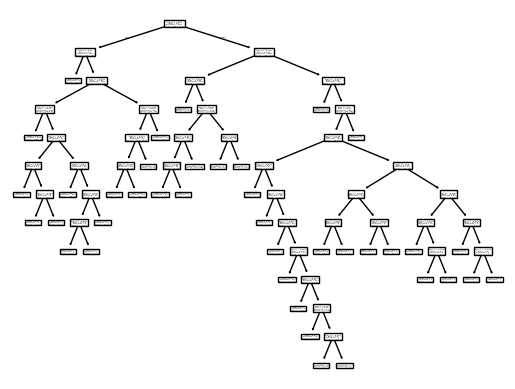

In [53]:
plot_tree(clf3)

In [55]:
clf1.predict(np.array([2.523572,	-1.860631,	-1.403523,	1.661734,	-1.285938]).reshape(1,5))

array([0])

In [56]:
clf2.predict(np.array([2.523572,	-1.860631,	-1.403523,	1.661734,	-1.285938]).reshape(1,5))

array([1])

In [57]:
clf3.predict(np.array([2.523572,	-1.860631,	-1.403523,	1.661734,	-1.285938]).reshape(1,5))

array([0])

here here prediction will be 0 which is true for our dataset